#Read the data

In [2]:
import pandas as pd
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Data preprocessing

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
x = data.iloc[:, 3:13]

In [10]:
x.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1104,589,France,Male,28,7,0.00,2,1,0,151645.96
3915,686,Germany,Male,43,2,134896.03,1,1,1,97847.05
6117,850,Spain,Male,37,2,0.00,2,1,0,119969.99
6613,524,France,Female,28,7,0.00,2,0,1,147100.72
5627,654,France,Male,29,4,132954.64,1,1,1,146715.07


In [9]:
y = data.iloc[:, 13:14]

In [11]:
y.sample(5)

,Exited
5006,0
557,1
9463,0
5846,0
6930,0


In [12]:
y.value_counts()

Exited
0         7963
1         2037
Name: count, dtype: int64

In [18]:
x = pd.get_dummies(x, drop_first=True)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Welcome AI

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [22]:
model = Sequential([
        Dense(units = 3, activation = 'relu'),
        Dense(units = 3, activation = 'relu'),
        Dropout(0.2),
        Dense(units = 3, activation = 'relu'),
        Dense(units = 1, activation = 'sigmoid')

     ])

In [23]:
model.compile(optimizer = 'Adam', loss ='binary_crossentropy', metrics = ['accuracy'])

In [24]:
model.fit(x = x_train, y = y_train, batch_size = 20, epochs = 30)

Epoch 1/30
400/400 [==============================] - 2s 2ms/step - loss: 0.5252 - accuracy: 0.7889
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4757 - accuracy: 0.7960
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4598 - accuracy: 0.7969
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.8037
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8059
Epoch 6/30
400/400 [==============================] - 1s 4ms/step - loss: 0.4399 - accuracy: 0.8044
Epoch 7/30
400/400 [==============================] - 1s 4ms/step - loss: 0.4400 - accuracy: 0.8060
Epoch 8/30
400/400 [==============================] - 1s 3ms/step - loss: 0.4384 - accuracy: 0.8051
Epoch 9/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4361 - accuracy: 0.8045
Epoch 10/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4360 - accuracy: 0.8071

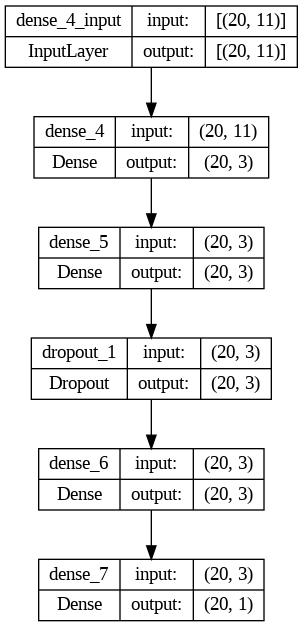

In [26]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)